In [1]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

## Problem description

Let P be a matrix with nb_date rows and nb_site columns
that encodes in P[i,t] the production of the site i at time t.

Let A[t] be a vector with nb_date. 

We're looking for a vector x of length nb_site, such that

p[t] = x[0]*P[t,0] + ... + x[1]*P[t,nb_site-1] >= A[t] for all t
and the variance of p is minimal

The code below generates some random data and solves the correponding problem.

In [47]:
## Some random data
nb_date=360
nb_site=3
P = matrix(np.random.uniform(low=0., high=1, size=nb_date*nb_site), 
           (nb_date,nb_site))
for i in range(nb_site):
    T = np.arange(nb_date)+nb_date*(i/nb_site)
    P[:,i] = P[:,i] + matrix(np.sin(2*np.pi*T/nb_date),(nb_date,1))

A = matrix(np.random.uniform(low=9., high=10., size=nb_date), 
           (nb_date,1))

## Define the optim problem
## Solves min x'Q x
## with G x <= h
Q = matrix(np.cov(np.transpose(np.array(P))))
#print(Q)
p=matrix(np.zeros(nb_site))
#print(p)
G=-P
#print(G)
h=-A
#print(h)

sol=solvers.qp(Q,p,G,h)
x=sol['x']

     pcost       dcost       gap    pres   dres
 0:  4.0853e+00  5.7897e+03  2e+04  1e+00  2e+03
 1:  8.8554e+00  6.6736e+02  2e+04  7e-01  2e+03
 2:  1.1575e+01  5.0338e+03  2e+04  7e-01  2e+03
 3:  2.0658e+01  3.6556e+03  2e+04  7e-01  2e+03
 4:  5.9963e+01 -1.2954e+04  2e+04  4e-01  1e+03
 5:  1.2791e+02 -6.3571e+03  7e+03  8e-02  2e+02
 6:  1.4209e+02  4.2047e+01  1e+02  4e-04  1e+00
 7:  1.1752e+02  1.1286e+02  5e+00  2e-05  4e-02
 8:  1.1721e+02  1.1716e+02  5e-02  2e-07  4e-04
 9:  1.1721e+02  1.1721e+02  5e-04  2e-09  4e-06
10:  1.1721e+02  1.1721e+02  5e-06  2e-11  4e-08
Optimal solution found.


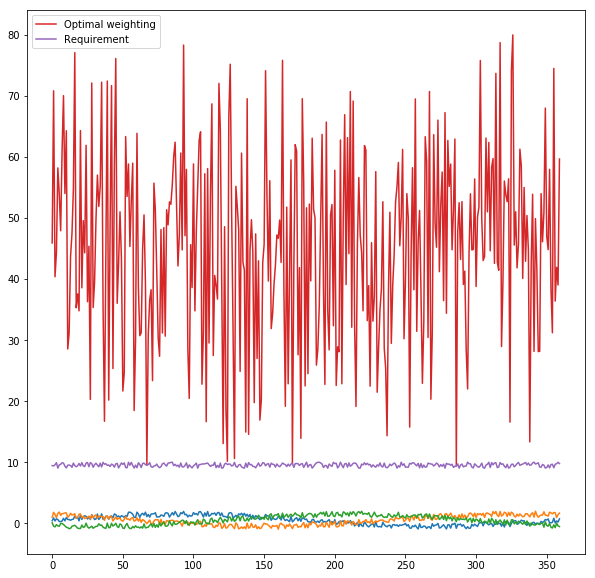

In [48]:
plt.figure(figsize=(10,10))
for i in range(nb_site):
    plt.plot(np.array(P[:,i]))

plt.plot(np.array(P).dot(np.array(x)),label="Optimal weighting")
plt.plot(A, label="Requirement")
plt.legend()